<a href="https://colab.research.google.com/github/ibrahimSert7/web_scraping/blob/main/Dergipark_tarih%26%26spor%26%26matematik_TAMAMI_ipynb_adl%C4%B1_not_defterinin_kopyas%C4%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [116]:
import os
import bs4
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import os
import time
import urllib.request
import re
import urllib3
from pandas import DataFrame
import csv
import datetime
from datetime import datetime, timedelta ,date


In [118]:
csv_file=open('deneme.csv','a',encoding='utf-8')
csv_writer=csv.writer(csv_file)
csv_writer.writerow(['link','tarih','maincategory','category','baslik','content'])



49

In [119]:
spor_link = []
tarih_link = []
biyoloji_link = []

In [120]:
def date_creator():
  for i in range(1,3): #135 sayfa var
    lnk = "https://dergipark.org.tr/tr/search/{}?q=&section=articles&aggs%5Bsubjects.id%5D%5B0%5D=260".format(str(i))
    spor_link.append(lnk)

  for i in range(1,3): #389 sayfa var
    lnk = "https://dergipark.org.tr/tr/search/{}?q=&section=articles&aggs%5Bsubjects.id%5D%5B0%5D=357".format(str(i))
    tarih_link.append(lnk)

  for i in range(1,3): #168 sayfa var
    lnk = "https://dergipark.org.tr/tr/search/{}?q=&section=articles&aggs%5Bsubjects.id%5D%5B0%5D=169".format(str(i))
    biyoloji_link.append(lnk)


In [121]:
date_creator()

In [122]:
print(spor_link) # tane haber var
print(tarih_link) # tane haber var
print(biyoloji_link)

['https://dergipark.org.tr/tr/search/1?q=&section=articles&aggs%5Bsubjects.id%5D%5B0%5D=260', 'https://dergipark.org.tr/tr/search/2?q=&section=articles&aggs%5Bsubjects.id%5D%5B0%5D=260']
['https://dergipark.org.tr/tr/search/1?q=&section=articles&aggs%5Bsubjects.id%5D%5B0%5D=357', 'https://dergipark.org.tr/tr/search/2?q=&section=articles&aggs%5Bsubjects.id%5D%5B0%5D=357']
['https://dergipark.org.tr/tr/search/1?q=&section=articles&aggs%5Bsubjects.id%5D%5B0%5D=169', 'https://dergipark.org.tr/tr/search/2?q=&section=articles&aggs%5Bsubjects.id%5D%5B0%5D=169']


In [123]:
spor_wrong_link = []

In [124]:
def tarih_get_link_creator(url):
  html = requests.get(url).content                                                          
  soup = BeautifulSoup(html,"html.parser")
  list = soup.find("div",{"class" :"article-cards"}).find_all("div",{"class": "card-body"})
  for i in list:
    href = i.find("a").get("href")
    with open("dergipark_tarih_Links.txt","a",encoding="utf-8") as file :
      file.write(href+"\n")
      print(1)
    


In [ ]:
tarih_get_link_creator('https://dergipark.org.tr/tr/search?q=&section=articles&aggs%5Bsubjects.id%5D%5B0%5D=357')

In [125]:
def spor_get_link_creator(url):
  html = requests.get(url).content                                                          
  soup = BeautifulSoup(html,"html.parser")
  list = soup.find("div",{"class" :"article-cards"}).find_all("div",{"class": "card-body"})
  for i in list:
    href = i.find("a").get("href")
 
    with open("dergipark_spor_Links.txt","a",encoding="utf-8") as file :
        file.write(href+"\n")
        print(1)

In [ ]:
spor_get_link_creator('https://dergipark.org.tr/tr/search?q=&section=articles&aggs%5Bsubjects.id%5D%5B0%5D=260')

In [126]:
def biyoloji_get_link_creator(url):
  html = requests.get(url).content                                                          
  soup = BeautifulSoup(html,"html.parser")
  list = soup.find("div",{"class" :"article-cards"}).find_all("div",{"class": "card-body"})
  for i in list:
    href = i.find("a").get("href")
 
    with open("dergipark_biyoloji_Links.txt","a",encoding="utf-8") as file :
        file.write(href+"\n")
        print(1)

In [ ]:
biyoloji_get_link_creator('https://dergipark.org.tr/tr/search/3?q=&section=articles&aggs%5Bsubjects.id%5D%5B0%5D=194')

In [127]:
import concurrent
t1=time.time()
with concurrent.futures.ProcessPoolExecutor() as execut:
  b_res=[execut.submit(tarih_get_link_creator,i.strip()) for i in tarih_link]
print(time.time()-t1)

t2=time.time()
with concurrent.futures.ProcessPoolExecutor() as execut:
  b_res=[execut.submit(spor_get_link_creator,i.strip()) for i in spor_link]
print(time.time()-t2)

t3=time.time()
with concurrent.futures.ProcessPoolExecutor() as execut:
  b_res=[execut.submit(biyoloji_get_link_creator,i.strip()) for i in biyoloji_link]
print(time.time()-t3)

11
1

11

11

11
1
1
1

1
1
11
1

11
1

11

11

1
1
1
11

11
1

11

11

1
11

11
1

11

11

1
1
1.5943329334259033
1
11

1
11

111


11
1

1
1
11

11

1
11

1
11

11

11
1
1

11

11

11

11

1
1
1
1
11

1
11

1
1.5397262573242188
1
1
11

11

11

1
1
11

11

11

11
1

11
1
1

11

11

1
1
11

1
11

11
1

11

1
11

11

11
1

1
1.551229476928711


In [128]:
spor_links = []
tarih_links = []
biyoloji_links = []

In [129]:
with open("dergipark_spor_Links.txt",'r',newline='') as f:
  for i in f.readlines():    
  # reader=csv.reader(f)
    i = i.strip("\n")
    spor_links.append(i)

In [130]:
with open("dergipark_tarih_Links.txt",'r',newline='') as f:
  for i in f.readlines():    
    i = i.strip("\n")

    tarih_links.append(i)

In [131]:
with open("dergipark_biyoloji_Links.txt",'r',newline='') as f:
  for i in f.readlines():    
    i = i.strip("\n")

    biyoloji_links.append(i)

In [132]:
print(spor_links)
print(tarih_links)
print(biyoloji_links)

['https://dergipark.org.tr/tr/pub/yalvac/issue/72335/1170325', 'https://dergipark.org.tr/tr/pub/bsd/issue/72189/1122050', 'https://dergipark.org.tr/tr/pub/seder/issue/71337/1011913', 'https://dergipark.org.tr/tr/pub/bsd/issue/72189/1083048', 'https://dergipark.org.tr/tr/pub/tsed/issue/72480/1125816', 'https://dergipark.org.tr/tr/pub/sbd/issue/72236/998296', 'https://dergipark.org.tr/tr/pub/sbd/issue/72236/1089694', 'https://dergipark.org.tr/tr/pub/tsed/issue/72480/1136051', 'https://dergipark.org.tr/tr/pub/sbd/issue/72236/999376', 'https://dergipark.org.tr/tr/pub/tsed/issue/72480/1014054', 'https://dergipark.org.tr/tr/pub/omuspd/issue/72157/1097679', 'https://dergipark.org.tr/tr/pub/tsed/issue/72480/1118476', 'https://dergipark.org.tr/tr/pub/omuspd/issue/72157/1077375', 'https://dergipark.org.tr/tr/pub/tsed/issue/72480/896400', 'https://dergipark.org.tr/tr/pub/omuspd/issue/72157/1125510', 'https://dergipark.org.tr/tr/pub/tsed/issue/72480/934732', 'https://dergipark.org.tr/tr/pub/omuspd

In [133]:
def creator_tarih_content(url):
  html = requests.get(url).content
  soup = BeautifulSoup(html,"html.parser")
  title = soup.find("div",{"class" : "tab-pane active "}).find("h3").getText().strip() # title tamam 
  print(title)
  content = soup.find("div",{"class" : "article-abstract data-section"}).find("p").getText() #content tamam
  print(content)
  date = soup.find("span",{"class" : "article-subtitle"}).getText() #tarih tamam
  date=date.replace(" ","")
  date=date.split()
  date = date[4]
  print(date)
  maincategory = "Sosyal"
  category = "Tarih"

  sentence = "{} ; {} ; {} ; {} ; {} ; {}".format(url,date,maincategory,category,title,content)

  with open('deneme.csv', 'a', encoding='utf-8') as f:
    writer = csv.writer(f)
    writer.writerow([url,date,maincategory,category,title,content])

  # with open("dergipark_tarih_content.txt","a",encoding="utf-8") as file:
  #   file.write(sentence+"\n")


In [30]:
creator_tarih_content('https://dergipark.org.tr/tr/pub/ataddergi/issue/70680/1079862')

1839-1856 YILLARI ARASINDA MALATYA KAZASI’NIN NÜFUSU: ASPUZU’YA GÖÇ ve TANZİMAT FERMANI ÜZERİNDEN DEĞERLENDİRME
Osmanlı Devleti, klasik döneminde her devlet gibi hem sınırları içerisinde yaşayan tebaanın güvenliği hem de gelir kaynaklarının kontrolü açısından belli aralıklarla nüfus ve arazi sayıma gitmiştir. Bundan dolayı bu sayımları çeşitli defterlerde kayıt altında tutmayı temel görevleri arasında saymıştır. Böylece hâkimiyeti altındaki toprakların kullanımı, bu sayım üzerinden asker alma, vergi koyma gibi amaçlar için tahrirler, avarız defterleri, tımar tevcih defterleri gibi çeşitli usuller kullanılmıştır. Ancak Osmanlı’nın klasik dönemde yaptığı nüfus sayımları, XIX. yüzyılda girişilen yenileşme çabaları sonucunda değişime uğramıştır. II. Mahmud döneminde 1831 yılında ülke genelinde nüfus sayımları yapılmıştır. Modern anlamda ilk nüfus sayımı olarak görülen bu sayım, tüm Müslüman ve gayr-ı Müslim erkek nüfus üzerinden gerçekleştirilmiştir. Ülke genelinde yapılan nüfus sayımı ile

In [134]:
def creator_spor_content(url):
  html = requests.get(url).content
  soup = BeautifulSoup(html,"html.parser")
  title = soup.find("div",{"class" : "tab-pane active "}).find("h3").getText().strip() # title tamam 
  # print(title)
  content = soup.find("div",{"class" : "article-abstract data-section"}).find("p").getText()
  # print(content)
  date = soup.find("span",{"class" : "article-subtitle"}).getText() #tarih tamam
  date=date.replace(" ","")
  date=date.split()
  date = date[4]
  # print(date)
  maincategory = "Tıp"
  category = "Spor Bilimleri"
 

  sentence = "{} ; {} ; {} ; {} ; {} ; {}".format(url,date,maincategory,category,title,content)
  # calisan_listesi= {"isim":[title],
  #                 "yas":[content],
  #                  "maas":[category]}

  # dataframe = pd.DataFrame(calisan_listesi)

  # df=pd.read_csv("deneme.csv")

  # dataframe.head()
  
  # print(dataframe.columns)
  # print(dataframe.info())

  with open('deneme.csv', 'a', encoding='utf-8') as f:
    writer = csv.writer(f)
    writer.writerow([url,date,maincategory,category,title,content])
  with open("dergipark_spor_content.txt","a",encoding="utf-8") as file:
    file.write(sentence+"\n")



In [32]:
creator_spor_content('https://dergipark.org.tr/tr/pub/seder/issue/71337/1011913')

In [135]:
def creator_biyoloji_content(url):
  html = requests.get(url).content
  soup = BeautifulSoup(html,"html.parser")
  title = soup.find("div",{"class" : "tab-pane active "}).find("h3").getText().strip() # title tamam 
  print(title)
  content = soup.find("div",{"class" : "article-abstract data-section"}).find("p").getText()
  print(content)
  date = soup.find("span",{"class" : "article-subtitle"}).getText() #tarih tamam
  date=date.replace(" ","")
  date=date.split()
  date = date[4]
  print(date)
  maincategory = "Temel Bilimler"
  category = "biyoloji"
 

  sentence = "{} ; {} ; {} ; {} ; {} ; {}".format(url,date,maincategory,category,title,content)

  with open('deneme.csv', 'a', encoding='utf-8') as f:
    writer = csv.writer(f)
    writer.writerow([url,date,maincategory,category,title,content])
  # with open("dergipark_matematik_content.txt","a",encoding="utf-8") as file:
  #   file.write(sentence+"\n")



In [136]:
import concurrent
t1=time.time()
with concurrent.futures.ProcessPoolExecutor() as execut:
  b_res=[execut.submit(creator_tarih_content,i.strip()) for i in tarih_links]
print(time.time()-t1)

t2=time.time()
with concurrent.futures.ProcessPoolExecutor() as execut:
  b_res=[execut.submit(creator_spor_content,i.strip()) for i in spor_links]
print(time.time()-t2)

t3=time.time()
with concurrent.futures.ProcessPoolExecutor() as execut:
  b_res=[execut.submit(creator_biyoloji_content,i.strip()) for i in biyoloji_links]
print(time.time()-t3)

BİR ÂDEMİYET ANLATISI OLARAK VESÎLETÜ’N-NECÂT
Osmanlı dönemi Türk edebiyatında Hz. Peygamber’i konu edinen birçok dînî-edebî tür ortaya çıkmıştır. Hz. Peygamber’in doğumunun, mi’râcının ve ahlâkî özelliklerinin anlatıldığı mevlid türü bu dinî-edebî türler içinde birçok müstakil örneği bulunması açısından oldukça önemlidir. Bu türün Türk edebiyatında en meşhur örneği ise Süleyman Çelebi tarafından XV. yüzyılın hemen başında telif edilen Vesîletü’n-Necât isimli mesnevîdir. Vesîletü’n-Necât, sosyal ve siyasal işlevi açısından ehl-i sünnetin tasavvufî yorumuyla Osmanlı topraklarında itikâdî ve siyâsî birlikteliği sağlamaya çalışan bir metindir. Bu hususiyetiyle Vesîletü’n-Necât Osmanlı topraklarında yaşayan insanlar için istikamet tayin eden öncü ve kurucu metin şeklinde tavsif edilmiştir. Bununla birlikte muhtevâsı itibariyle tasavvufî düşünce zemininde telif edilen eser, Hz. Peygamber şahsında kaleme alınmış bir âdemiyet anlatısı olarak karşımıza çıkar. Vesîletü’n-Necât’ın zeminini oluşt

In [138]:
# f = open("deneme.csv")
# f.read()
# print(f
# f.close()

with open("deneme.csv") as f:
    print(f.read())

link,tarih,maincategory,category,baslik,content
https://dergipark.org.tr/tr/pub/sutad/issue/72322/1163212,26.08.2022,Sosyal,Tarih,BİR ÂDEMİYET ANLATISI OLARAK VESÎLETÜ’N-NECÂT,"Osmanlı dönemi Türk edebiyatında Hz. Peygamber’i konu edinen birçok dînî-edebî tür ortaya çıkmıştır. Hz. Peygamber’in doğumunun, mi’râcının ve ahlâkî özelliklerinin anlatıldığı mevlid türü bu dinî-edebî türler içinde birçok müstakil örneği bulunması açısından oldukça önemlidir. Bu türün Türk edebiyatında en meşhur örneği ise Süleyman Çelebi tarafından XV. yüzyılın hemen başında telif edilen Vesîletü’n-Necât isimli mesnevîdir. Vesîletü’n-Necât, sosyal ve siyasal işlevi açısından ehl-i sünnetin tasavvufî yorumuyla Osmanlı topraklarında itikâdî ve siyâsî birlikteliği sağlamaya çalışan bir metindir. Bu hususiyetiyle Vesîletü’n-Necât Osmanlı topraklarında yaşayan insanlar için istikamet tayin eden öncü ve kurucu metin şeklinde tavsif edilmiştir. Bununla birlikte muhtevâsı itibariyle tasavvufî düşünce zemininde telif 

In [137]:
pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
calisan_listesi= {"isim":["oguzhan","ozgur","yigit","okan","berkay"],
                  "yas":[22,21,25,20,17],
                   "maas":[5000,4000,9000,2500,1000]}

dataframe = pd.DataFrame(calisan_listesi)
dataframe.head()

,isim
0,oguzhan
1,ozgur
2,yigit
3,okan
4,berkay


In [139]:
df=pd.read_csv("deneme.csv")

  # df.head()
  # df.isnull().sum()
  # df.columns
  # df[["link","maincategory"]].head()
  # df.dropna(axis="columns",how="any").shape
# df.loc[[50]]
# df.Genre.describe()
df.columns


Index(['link', 'tarih', 'maincategory', 'category', 'baslik', 'content'], dtype='object')

In [ ]:
df.head()

In [140]:
df.isnull().sum()

link             0
tarih            0
maincategory     0
category         0
baslik           0
content         10
dtype: int64

In [141]:
df.shape

(144, 6)

In [142]:
df.dtypes

link            object
tarih           object
maincategory    object
category        object
baslik          object
content         object
dtype: object

In [143]:
import seaborn as sns

In [151]:
sns.set_theme()
sns.set(rc={"figure.dpi":75,  "figure.figsize":(12,9)})

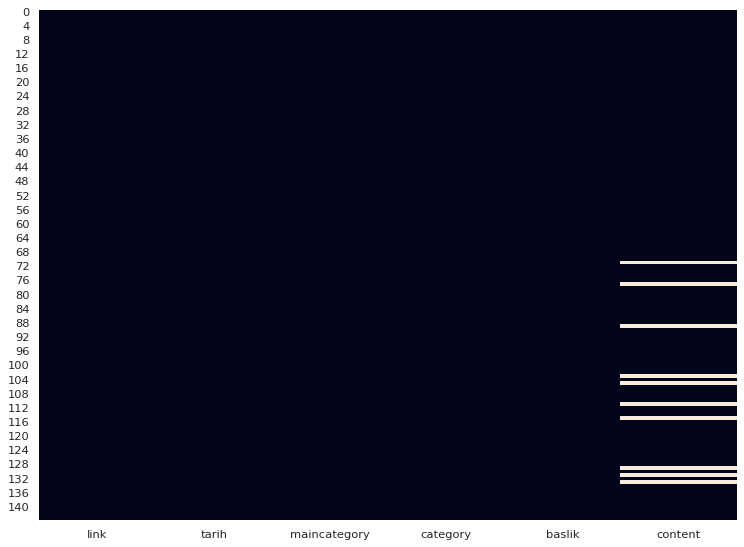

In [152]:
sns.heatmap(df.isnull(), cbar=False)

In [155]:
df.isnull().sum().sum()

10

In [157]:
rating_median = df["content"]
rating_median

0      Osmanlı dönemi Türk edebiyatında Hz. Peygamber...
1      Osmanlı Devleti’nde şehirlerin gelişip büyümes...
2      Some reforms were carried out in the Ottoman E...
3      In the studies of Ottoman history, population ...
4      Ortaçağ ve erken modern dönemde hükümdarın bed...
                             ...                        
139    In this study, different parts of Phytolacca a...
140    This research was carried out with the aim of ...
141    This study was performed in order to evaluate ...
142    Salt stress adversely affects plants and cause...
143    Vascular endothelial growth factor receptor-ty...
Name: content, Length: 144, dtype: object

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   link          144 non-null    object
 1   tarih         144 non-null    object
 2   maincategory  144 non-null    object
 3   category      144 non-null    object
 4   baslik        144 non-null    object
 5   content       134 non-null    object
dtypes: object(6)
memory usage: 6.9+ KB


In [162]:
df["link"].describe()

count                                                   144
unique                                                  144
top       https://dergipark.org.tr/tr/pub/sutad/issue/72...
freq                                                      1
Name: link, dtype: object

In [163]:
df["link"] = df["link"].astype("int64")

ValueError: ignored